In [3]:
import pandas as pd

In [4]:
data = './Housing.csv'
housing = pd.read_csv(data)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Data Cleaning
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
housing = pd.concat([housing, status], axis=1)
housing.drop(['furnishingstatus'], inplace=True, axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [7]:
# Normalizing Data
housing = (housing-housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [8]:
x = housing['area']
y = housing['price']

In [9]:
import seaborn as sns

/usr/local/anaconda/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


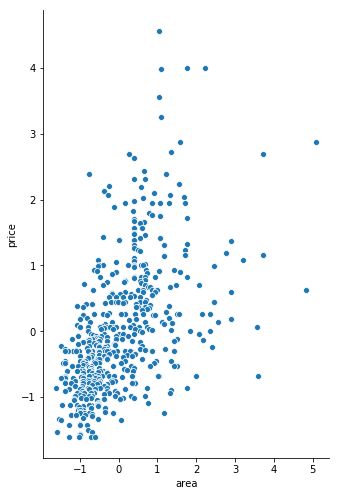

In [10]:
sns.pairplot(housing, x_vars='area', y_vars='price', kind='scatter', size=7, aspect=0.7)

# Gradient descent implementation

In [11]:
import numpy as np

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
# Gradient Descent
def gradient(x, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame(columns = ['m_current', 'c_current', 'cost'])
    for i in range(iters):
        y_current = (m_current * x) + c_current
        cost = sum([data**2 for data in (y - y_current)]) / N
        m_gradient = -(2/N) * sum(x * (y - y_current))
        c_gradient = (-2/N) * sum(y - y_current)
        m_current = m_current - learning_rate * m_gradient
        c_current = c_current - learning_rate * c_gradient
        gd_df.loc[i] = [m_current, c_current, cost]
    return gd_df

In [14]:
# Using gradient descent
gradients = gradient(x, y)
gradients

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
5,0.061081,3.053215e-17,0.945796
6,0.070562,3.956876e-17,0.936530
7,0.079854,4.067694e-17,0.927631
8,0.088960,4.414817e-17,0.919084
9,0.097884,5.958944e-17,0.910875


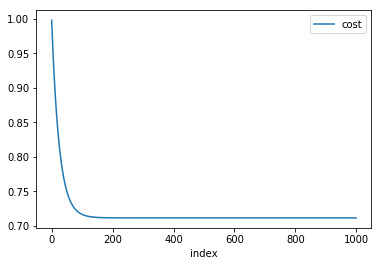

In [15]:
# Plotting cost against index
gradients.reset_index().plot.line(x='index', y='cost')

#### Multiple Gradient Descent

In [16]:
x = housing[['area','bedrooms']]
y = housing['price']

# Adding 1 as intercept
x['intercept'] = 1
x = x.reindex_axis(['intercept','area','bedrooms'], axis=1)
x.head()

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
# Here theta is the coefficients of the eqn
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iterations = 1000

In [19]:
# Function to compute cost
def compute_cost(x, y, theta):
    return np.sum(np.square(np.matmul(x, theta) - y))/(2*len(y))

In [22]:
# Function to calculate gradient descent for multiple feature
def grad_des_multi(x, y, theta, alpha, iterations):
    theta = np.zeros(x.shape[1])
    m = len(x)
    gd_df_mul = pd.DataFrame(columns=['Bets', 'Cost'])
    for i in range(iterations):
        gradient = (1/m)*(np.matmul(x.T, np.matmul(x, theta)-y)) # The derivate of cost function
        theta = theta - alpha*gradient
        cost = compute_cost(x, y, theta)
        gd_df_mul.loc[i] = [theta, cost]
    return gd_df_mul

In [23]:
grad_des_multi(x, y, theta, alpha, iterations)

,Bets,Cost
0,"[-1.3607871200910176e-18, 0.005350138644096793...",0.494906
1,"[1.1244827698955712e-18, 0.010641328951860771,...",0.490824
2,"[1.988215911989271e-18, 0.015874226967184046, ...",0.486834
3,"[3.0067691455903323e-18, 0.02104948137493461, ...",0.482935
4,"[6.3476237518018126e-18, 0.02616773358401024, ...",0.479124
5,"[8.40917549661036e-18, 0.031229617809450723, 0...",0.475400
6,"[8.315468599119062e-18, 0.036235761153618984, ...",0.471759
7,"[1.0560359925975802e-17, 0.04118678368646184, ...",0.468202
8,"[1.0067380160912889e-17, 0.04608329852486084, ...",0.464724
9,"[1.2894883937389434e-17, 0.050925911911083366,...",0.461326


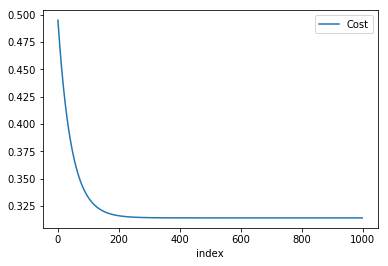

In [24]:
# print cost
grad_des_multi(x, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['Cost'])